## Menggunakan Sample dataset pada sckit-learn

### Load Dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# type(iris['data'])
iris['data'].dtype

### Mendeskripsikan sebuah sample dataset

In [ ]:
print(iris.DESCR)

## Eksplanatory & Response Variables (Feature & Target)

### Explanatory Variable (Features)

In [2]:
X = iris.data
X.shape
# X

(150, 4)

### Response Variable (Target)

In [3]:
y = iris.target
y.shape
# y

(150,)

## Feature & Target Names

In [4]:
feature = iris.feature_names
feature

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
target = iris.target_names
target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Visualisasi Data

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

['setosa' 'versicolor' 'virginica']


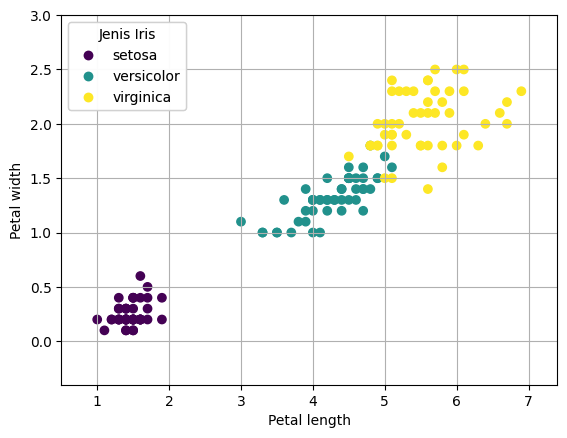

In [12]:
# X = X[:, :2]

# x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
# y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5

# scatter = plt.scatter(X[:,0], X[:,1], c=y)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.grid(True)
# print(target) # Tambahkan baris ini untuk melihat isi variabel 'target'
# legends = plt.legend(handles=scatter.legend_elements()[0], labels=list(target), title="Jenis Iris")
# plt.gca().add_artist(legends)
# plt.show()

X = iris.data[:, 2:]  # Mengambil dua fitur terakhir (petal length dan petal width)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Petal length')  # Mengubah label sumbu x
plt.ylabel('Petal width')   # Mengubah label sumbu y

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
print(target)
legends = plt.legend(handles=scatter.legend_elements()[0], labels=list(target), title="Jenis Iris")
plt.gca().add_artist(legends)
plt.show()


## Training & Testing Dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.19, random_state=1)

# print(f'X train: {X_train.shape}')
# print(f'X test: {X_test.shape}')
# print(f'y train: {y_train.shape}')
# print(f'y test: {y_test.shape}')

In [17]:
# iris = load_iris(as_frame=True)
# iris_df = iris.frame
# iris_df.head()

In [9]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy * 100:.2f}")

Akurasi: 96.55


## Visualisasi Model yang telah diprediksi

In [14]:
cm = confusion_matrix(y_test, y_pred)

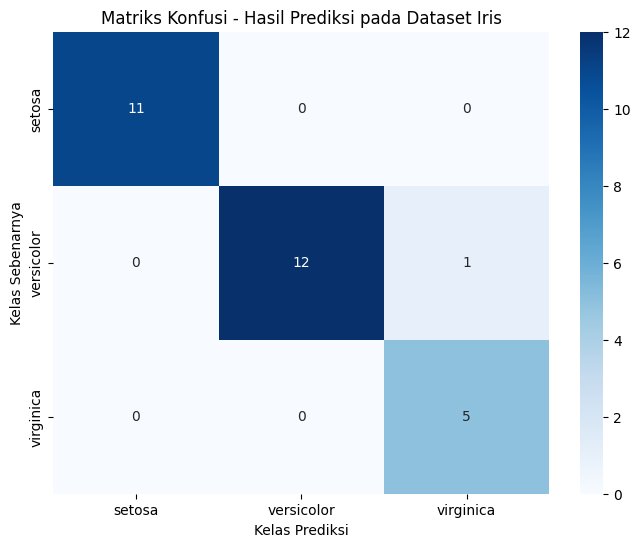

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target, yticklabels=target)
plt.title('Matriks Konfusi - Hasil Prediksi pada Dataset Iris')
plt.xlabel('Kelas Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.show()

## Simpan Model

In [19]:
import pickle

filename = 'iris_decision_tree_model.pkl'
pickle.dump(model, open(filename, 'wb'))
print(f"Model berhasil disimpan sebagai {filename}")

Model berhasil disimpan sebagai iris_decision_tree_model.pkl
